# "Markov Zincirlerine kisa bir giris" icin gorseller

## Umit Islak
## Arda Akdemir

In [87]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
#import pygraphviz
import pyparsing
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from IPython.display import Math,Image

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from([(0,1), (0,2), (1,1), (1,2)])
edge_labels={("0","1"):6}

In [3]:
p=product(range(10),range(5))
import pygraphviz as pgv

In [4]:
from graphviz import Digraph
g = Digraph('G')
g.edge("1","1",label="0.5")
g.edge("1","2",label="0.5")
g.edge("2","1",label="0.3")
g.edge("2","2",label="0.7")
g.edge("3","2",label="0.1")
g.edge("3","3",label="0.1")
g.edge("3","4",label="0.8")
g.edge("4","3",label="0.8")
g.edge("4","4",label="0.2")
g.view()


'G.gv.pdf'

In [5]:
plt.savefig("ilkfig.png")

<Figure size 432x288 with 0 Axes>

**2 durumlu Markov zinciri ** 

 bolum 4 sayfa 11

In [298]:
p=0.2
q=0.4
x=0 ## initial distribution
X0=np.array([x,1-x])
P=np.array([[1-p,p],[q,1-q]])
X0s=[X0]
for x in range(10):
    X0=np.matmul(X0,P)
    X0s.append(X0)
X0s

[array([0, 1]),
 array([0.4, 0.6]),
 array([0.56, 0.44]),
 array([0.624, 0.376]),
 array([0.6496, 0.3504]),
 array([0.65984, 0.34016]),
 array([0.663936, 0.336064]),
 array([0.6655744, 0.3344256]),
 array([0.66622976, 0.33377024]),
 array([0.6664919, 0.3335081]),
 array([0.66659676, 0.33340324])]

sayfa 12  Markov Chains Mixing Times ornegi

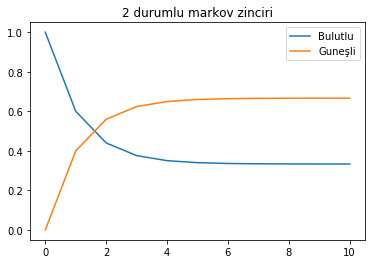

Guneşli beklenen: 0.666667
Bulutlu beklenen: 0.333333


In [304]:
## sayfa 12
G=[x[0] for x in X0s]
B=[x[1] for x in X0s]
plt.title("2 durumlu markov zinciri")
plt.plot(range(len(B)),B,label="Bulutlu")
plt.plot(range(len(B)),G,label="Guneşli")
plt.legend()
plt.savefig("gunyagolasilıklar")
plt.show()
print("Guneşli beklenen: %f" %(q/(q+p) ))
print("Bulutlu beklenen: %f" %(p/(p+q)))

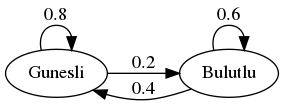

In [300]:
from networkx.drawing.nx_agraph import write_dot
B=nx.DiGraph(rankdir="LR")
states=["Gunesli","Bulutlu"]
pos={}
pos["Gunesli"]=(0,0)
pos["Bulutlu"]=(1,1)
B.add_nodes_from(states)
B.add_edge(states[0],states[0],label=1-p)
B.add_edge(states[0],states[1],label=p)
B.add_edge(states[1],states[0],label=q)
B.add_edge(states[1],states[1],label=1-q)
edge_labs={}
#nx.draw(B)
#nx.draw_networkx_nodes(B,pos,alpha=0)
#nx.draw_networkx_edges(B,pos,width=0.1)
#nx.draw_networkx_edge_labels(B,pos,edge_labels=nx.get_edge_attributes(B,"label"))
#plt.axis('off')
write_dot(B,"gunesbulut.dot") #dot -Tpng graph.dot -o a.png
! dot -Tpng gunesbulut.dot -o gunbul.png
Image("gunbul.png")

In [272]:
## Gecis matrisinden gecis semasi olusturma
## names statelerin isimleri
## P gecis olasiliklari
def transitiongraph(names,P):
    B=nx.DiGraph(rankdir="LR")
    B.add_nodes_from(names)
    for i,j in product(range(len(P)),range(len(P))):
        if P[i][j]!=0:
            B.add_edge(names[i],names[j],label=P[i][j])
    return B

In [273]:
def drawgraph(B,dotfilename,pos1):
    pos=pos1
    plt.figure(figsize=(10,5))
    plt.axis('off')
    nx.draw_networkx(B,pos=pos,alpha=1)
    nx.draw_networkx_edges(B,pos=pos)
    nx.draw_networkx_edge_labels(B,pos=pos,edge_labels=nx.get_edge_attributes(B,"label"))
    write_dot(B,dotfilename)

In [274]:
import random
def randomn(n):
    list1=[]
    for x in range(n):
        list1.append(random.random())
    tot=sum(list1)
    for x in range(n):
        list1[x]/=tot
    return list1

### Mutasyon ornegi

bolum 7 sayfa 16 

In [346]:
k=4
beta=0.1
P=np.ones((k,k))
X_0=np.array(randomn(k))
X_0s=[X_0]
for i,j in product(range(k),range(k)):
    if i==j:
        P[i][j]=1-beta
    else:
        P[i][j]=beta/(k-1)

In [347]:
for x in range(200):
    X_0=np.matmul(X_0,P)
    X_0s.append(X_0)

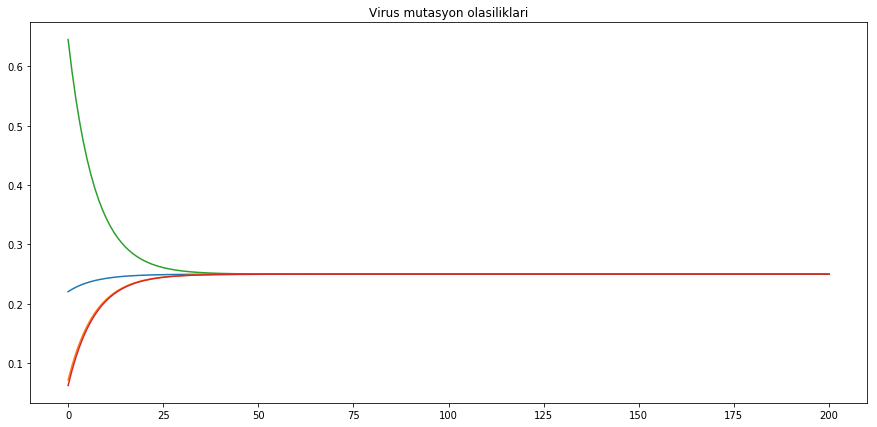

array([0.24997701, 0.24986101, 0.25030827, 0.2498537 ])

In [348]:
plt.figure(figsize=(15,7))
for x in range(len(X_0s[0])):
    xs=[time[x] for time in X_0s]
    plt.plot(range(len(xs)),xs)
plt.title("Virus mutasyon olasiliklari")
plt.show()
X_0s[50]

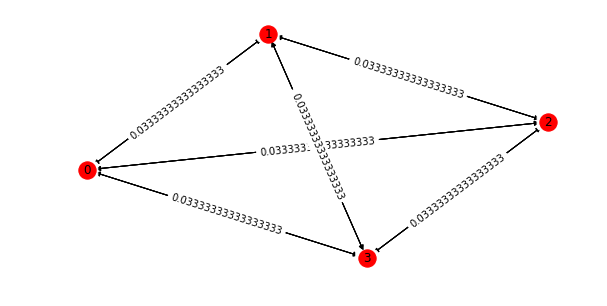

In [349]:
names=[i for i in range(k)]
Mut=transitiongraph(names,P)
pos1=nx.spring_layout(Mut)
drawgraph(Mut,"mut.dot",pos1)
! dot -Tpng mut.dot -o mut.png

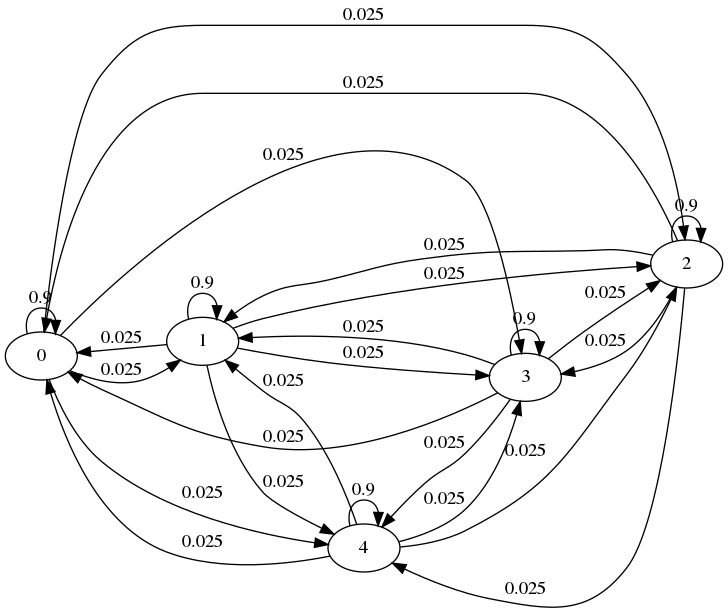

In [317]:
Image("mut.png")

### Indirgenme Gecis Matrisi

bolum 8 sayfa 18

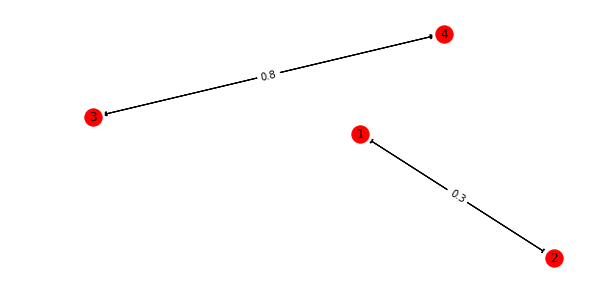

In [318]:
names=[1,2,3,4]
P=[[0.5,0.5,0,0],[0.3,0.7,0,0],[0,0,0.2,0.8],[0,0,0.8,0.2]]
B=transitiongraph(names,P)
pos1=nx.spring_layout(B)
drawgraph(B,"indir.dot",pos1)

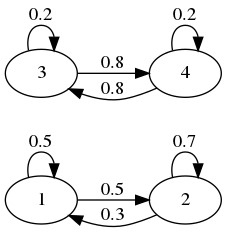

In [319]:
! dot -Tpng indir.dot -o indir.png
Image("indir.png")

### Ehrenfest

bolum 9 sayfa 21

In [320]:
n=5
names=[x for x in range(n+1)]
P=[]##transition matrix
for x in range(n+1):
    p=[0 for x in range(n+1)]
    p[max(0,x-1)]=float(x)/n
    p[min(n,x+1)]=float(n-x)/n
    P.append(p)

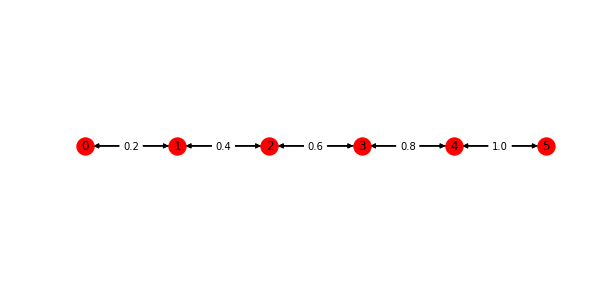

In [321]:

B=transitiongraph(names,P)
pos={}
for name in names:
    pos[name]=(name,3)
drawgraph(B,"ehren.dot",pos)
! dot -Tpng ehren.dot -o ehren2.png

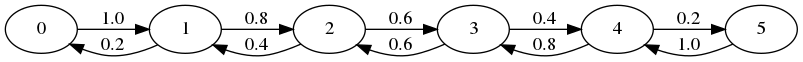

In [322]:
Image("ehren2.png")

### Bakalim dogru mu??

Kagit ustunde teorik olarak buldugumuz verilerin dogru olup olmadigindan daha emin olmak icin bilgisayar simulasyonlarindan faydalanabiliriz. Deneyi defalarca tekrarladigimizda elde ettigimiz degerin (empirik deger) teorik degere yakin olmasini bekliyoruz.

#### Teorik degerler 

In [323]:
def factorial(n):
    if n==0 or n==1:
        return 1
    else:
        return n * factorial(n-1)

In [324]:
def ninjlisi(n,j):
    nom=1.0
    for x in range(j):
        nom*=n-x
    den=factorial(j)
    return nom/den

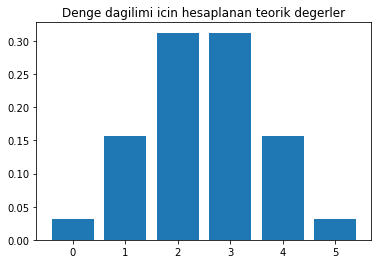

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

In [325]:
teorikdegerler=np.ones(n+1)
for x in range(n+1):
    if x==0 or x==n:
        teorikdegerler[x]=1.0/(pow(2,n))
    else:
        teorikdegerler[x]=ninjlisi(n,x)*(1/pow(2,n))
plt.bar(range(n+1),teorikdegerler)
plt.title("Denge dagilimi icin hesaplanan teorik degerler")
plt.show()
teorikdegerler

In [326]:
start_number=0## baslangicta A cuvalindaki top sayisi
X_0=np.array([1 if x==start_number else 0 for x in range(n+1)])

In [327]:
def ind(list1):
    for x in range(len(list1)):
        if list1[x]==1:
            return x
    return -1

In [328]:
def ehrenfestsimul(basdurum,M):
    ilk=ind(basdurum)
    top_say= len(basdurum)-1
    counts=[0 for x in range(top_say+1)]
    counts[ilk]=1
    for x in range(M):
        rand1=np.random.random()
        if ilk==top_say:
            ilk-=1
        elif ilk==0:
            ilk+=1
        else:
            a=1.0
            a*=(top_say-ilk)
            a/=top_say
            if rand1 < a:
                ilk+=1
            else:
                ilk-=1
        counts[ilk]+=1
    return counts

[285, 1508, 3109, 3158, 1607, 334]
[ 312.5 1562.5 3125.  3125.  1562.5  312.5]


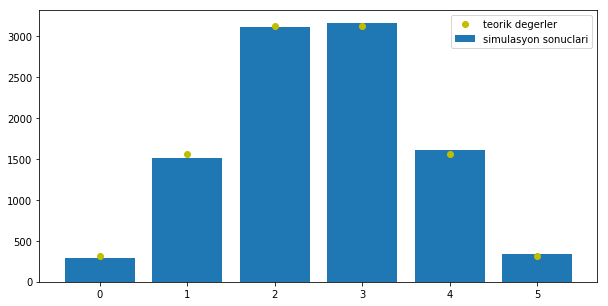

In [329]:
M=10000 # M defa cuvallardan rasgele top cekicez ve A cuvalinda j top olma durumlarini sayicaz
empirik=ehrenfestsimul(X_0,M)
teorikdeger=teorikdegerler*M
print(empirik)
print(teorikdeger)
x=[i for i in range(n+1)]
plt.figure(figsize=(10,5))
plt.bar(x,empirik,label='simulasyon sonuclari')
plt.plot(x,teorikdeger ,"ro",label='teorik degerler',color='y')
plt.legend()
plt.savefig("ehrensimul")
plt.show()

### Polya Urn Modeli 
   bolum 13 sayfa 30

In [373]:
T=3
P=np.zeros((T+2,T+2))
for i in range(T+1):
    P[i][i+1]=float(i+1)/(T+2)
    P[i][i]=(T+2-float(i+1))/(T+2)

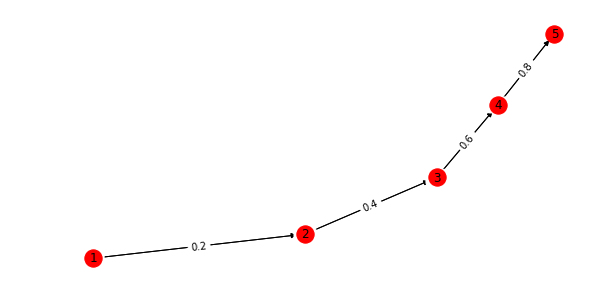

In [375]:
names=[x+1 for x in range(T+2)]
PolG=transitiongraph(names,P)
pos=nx.spring_layout(PolG)
drawgraph(PolG,"Polya.dot",pos)
! dot -Tpng Polya.dot -o Polya.png

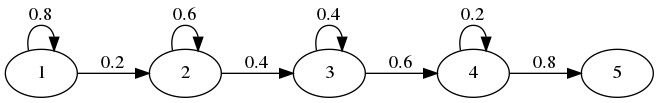

In [376]:
Image("Polya.png")

In [330]:
## bakalim gercekten de polya cuval modelinde X_t aninda herhangi bir durumda olma olasiligimiz esit mi?

In [331]:
## rastgele 1 index secelim
## bu indisteki top ile ayni renkte N adet topu cuvala ekleyelim
def drawandput(polyaurn,N):
    yenicuval=[x for x in polyaurn]
    rand1=int(random.random()*len(polyaurn))
    for i in range(N):
        yenicuval.append(polyaurn[rand1])
    return yenicuval

In [332]:
## t aninda cuvaldaki siyah top sayisi
def X_t(cuval,t):
    return cuval[:t+2].count("s")

In [333]:
##  nAdim sonra 
def polysimul(cuval,nAdim):
    cuval1=cuval
    for i in range(nAdim):
        cuval1=drawandput(cuval1,1)
    return cuval1

[]

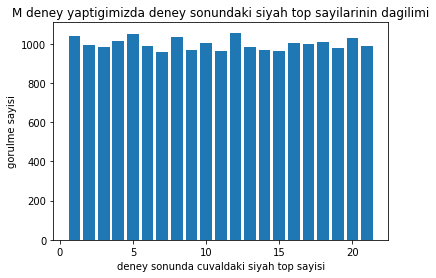

In [334]:
##simulasyonu N adim icin M kez tekrarladigimizda tekduze dagilima yakin bir dagilim bekliyoruz
M=21000
N=20
siyahsayisi=[]
for i in range(M):
    cuval=["s","b"]
    c1=polysimul(cuval,N)
    siyahsayisi.append(c1.count("s"))
siyahtoplams=[]## her olayin gorulme sayilarini iceren array
for i in range(1,N+2):
    siyahtoplams.append(siyahsayisi.count(i))
b=plt.bar(range(1,N+2),siyahtoplams)
plt.xlabel('deney sonunda cuvaldaki siyah top sayisi')
plt.ylabel('gorulme sayisi')
plt.title("M deney yaptigimizda deney sonundaki siyah top sayilarinin dagilimi")
a=plt.savefig("polyasimul")
plt.plot()

### 3-D Rasgele Yuruyus

bolum 14 sayfa 31

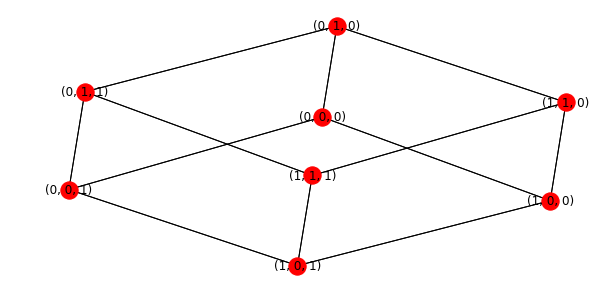

In [335]:
H=nx.hypercube_graph(3)
pos=nx.spring_layout(H)
drawgraph(H,"hyper1.dot",pos)
! dot -Tpng hyper1.dot -o hyper1.png
plt.savefig("hypernet")

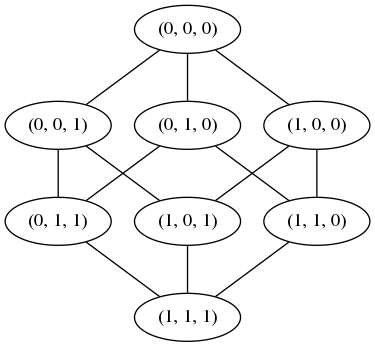

In [241]:
Image("hyper1.png")

In [336]:
def generatecube():
    init=[0,0,0]
    list1=[init]
    inds=[]
    used=[]
    c=1
    ind1=0
    for x in list1:
        if x not in used:
            for j in range(len(x)):
                pnew=[i for i in x]
                pnew[j]=1
                if pnew!=x:
                    list1.append(pnew)
                    inds.append(ind1)
            used.append(x)
        ind1+=1
    return list1,inds

In [337]:
def edges(list1,inds):
    edgel=[]
    for i in range(0,len(inds)):
        edgel.append((list1[inds[i]],list1[i+1]))
    return edgel

In [338]:
list1,inds=generatecube()
edgel=edges(list1,inds)

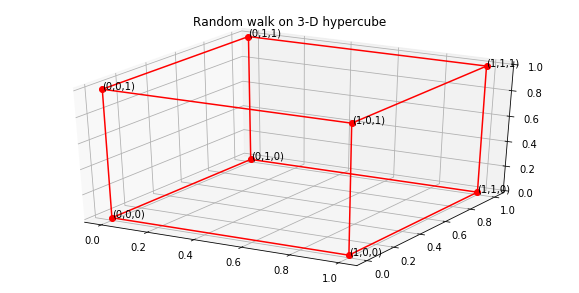

In [339]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
x=[0,0,0,0,1,1,1,1]
y=[0,0,1,1,0,0,1,1]
z=[0,1,0,1,0,1,0,1]
ax.plot(x,y,z,'ro')
for i in range(len(x)):
    label="(%d,%d,%d)" %(x[i],y[i],z[i])
    ax.text(x[i],y[i],z[i],label)
for edge in edgel:
    ax.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]],[edge[0][2],edge[1][2]],color="r")
plt.title("Random walk on 3-D hypercube")
plt.savefig("randomwalk3d")
plt.show()


### Kupon Toplama Problemi

bolum 15 sayfa 31

In [343]:
##basitlestirmek icin her kuponun cikma olasiligini 1/M aliyoruz
M=4
K=np.zeros((M+1,M+1))
for i in range(M):
    K[i][i]=float(i)/M
    K[i][i+1]=(M-float(i))/M

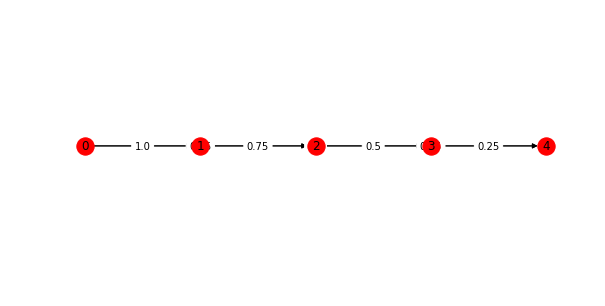

In [344]:
names=[i for i in range(M+1)]
KG=transitiongraph(names,K)
pos={}
for name in names:
    pos[name]=(name,3)
drawgraph(KG,"kupon.dot",pos)
! dot -Tpng kupon.dot -o kupon2.png

			Kupon toplama problemi 4 kupon icin gecis grafigi


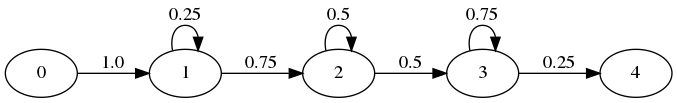

In [345]:
print("\t\t\tKupon toplama problemi %d kupon icin gecis grafigi" %M)
Image("kupon2.png")